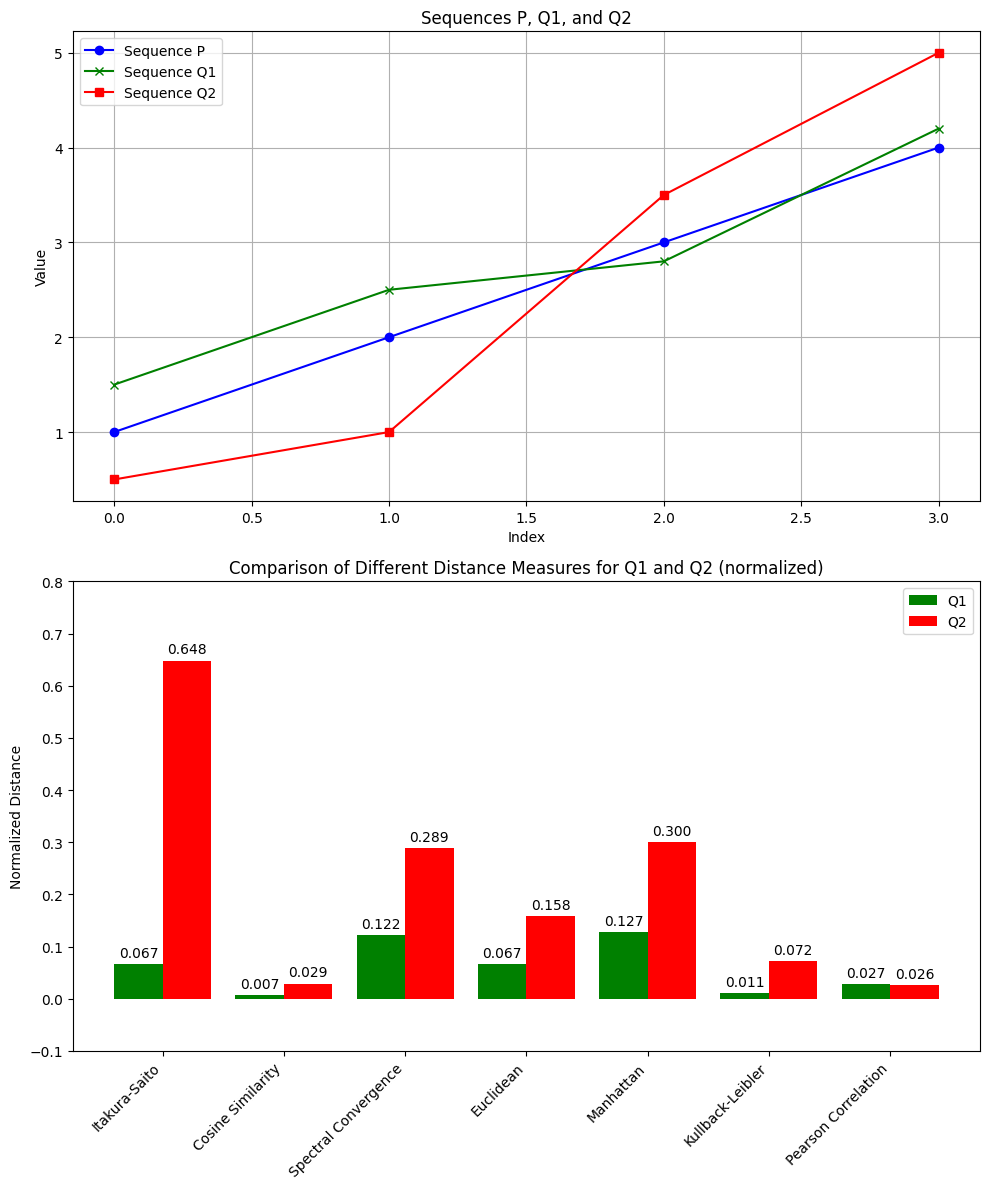

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.stats import pearsonr

class DistanceMetrics:
    def __init__(self, p, q):
        self.p = np.array(p)
        self.q = np.array(q)
        # Ensure the distributions are normalized
        self.p = self.p / np.sum(self.p)
        self.q = self.q / np.sum(self.q)
    
    def itakura_saito_distance(self):
        """Calculate the Itakura-Saito distance."""
        return np.sum(self.p / self.q - np.log(self.p / self.q) - 1)
    
    def cosine_similarity(self):
        """Calculate the cosine similarity."""
        return np.dot(self.p, self.q) / (norm(self.p) * norm(self.q))
    
    def spectral_convergence_distance(self):
        """Calculate the spectral convergence distance."""
        return norm(self.p - self.q) / norm(self.p)
    
    def euclidean_distance(self):
        """Calculate the Euclidean distance."""
        return norm(self.p - self.q)
    
    def manhattan_distance(self):
        """Calculate the Manhattan distance."""
        return np.sum(np.abs(self.p - self.q))
    
    def kullback_leibler_divergence(self):
        """Calculate the Kullback-Leibler divergence."""
        epsilon = 1e-10  # Small constant to avoid log(0)
        p_safe = self.p + epsilon
        q_safe = self.q + epsilon
        return np.sum(p_safe * np.log(p_safe / q_safe))
    
    def pearson_correlation_coefficient(self):
        """Calculate the Pearson correlation coefficient."""
        coefficient, _ = pearsonr(self.p, self.q)
        return coefficient

# Example sequences
P = [1.0, 2.0, 3.0, 4.0]
Q1 = [1.5, 2.5, 2.8, 4.2]
Q2 = [0.5, 1.0, 3.5, 5.0]

# Compute distances and similarities for Q1 and Q2
metrics_q1 = DistanceMetrics(P, Q1)
metrics_q2 = DistanceMetrics(P, Q2)

distances_q1 = {
    'Itakura-Saito': metrics_q1.itakura_saito_distance(),
    'Cosine Similarity': 1 - metrics_q1.cosine_similarity(),
    'Spectral Convergence': metrics_q1.spectral_convergence_distance(),
    'Euclidean': metrics_q1.euclidean_distance(),
    'Manhattan': metrics_q1.manhattan_distance(),
    'Kullback-Leibler': metrics_q1.kullback_leibler_divergence(),
    'Pearson Correlation': 1 - metrics_q1.pearson_correlation_coefficient()
}

distances_q2 = {
    'Itakura-Saito': metrics_q2.itakura_saito_distance(),
    'Cosine Similarity': 1 - metrics_q2.cosine_similarity(),
    'Spectral Convergence': metrics_q2.spectral_convergence_distance(),
    'Euclidean': metrics_q2.euclidean_distance(),
    'Manhattan': metrics_q2.manhattan_distance(),
    'Kullback-Leibler': metrics_q2.kullback_leibler_divergence(),
    'Pearson Correlation': 1 - metrics_q2.pearson_correlation_coefficient()
}

# Plotting the sequences and distances
plt.figure(figsize=(10, 12))

colors = ['b', 'g', 'r']  # Define the colors

plt.subplot(2, 1, 1)
plt.plot(P, label='Sequence P', marker='o', color=colors[0])
plt.plot(Q1, label='Sequence Q1', marker='x', color=colors[1])
plt.plot(Q2, label='Sequence Q2', marker='s', color=colors[2])
plt.title('Sequences P, Q1, and Q2')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Bar plot to compare distances
labels = list(distances_q1.keys())
q1_values = list(distances_q1.values())
q2_values = list(distances_q2.values())

x = np.arange(len(labels))  # Label locations
width = 0.4  # Width of the bars

plt.subplot(2, 1, 2)
ax = plt.gca()  # Get current axes

rects1 = ax.bar(x - width / 2, q1_values, width, label='Q1', color=colors[1])
rects2 = ax.bar(x + width / 2, q2_values, width, label='Q2', color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized Distance')
ax.set_title('Comparison of Different Distance Measures for Q1 and Q2 (normalized)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
ax.set_ylim(-0.1, 0.8)

# Display the values on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height < 0:  # Check if the value is negative
            ax.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='top')
        else:
            ax.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()
